# Grupo Turing - Processo Seletivo 2019.2
## Exemplo de Análise de Dados - Red Wine Quality
Dataset: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

Descrição do dataset (retirada do link acima):

> - **fixed acidity:**
    most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
>
> - **volatile acidity:**
    the amount of acetic acid in wine, which at too high of levels can
    lead to an unpleasant, vinegar taste
>
> - **citric acid:**
    found in small quantities, citric acid can add 'freshness' and flavor to wines
>
> - **residual sugar:**
    the amount of sugar remaining after fermentation stops, it's rare to find
    wines with less than 1 gram/liter and wines with greater than 45 grams/liter
    are considered sweet
>
> - **chlorides:**
    the amount of salt in the wine
>
> - **free sulfur dioxide:**
    the free form of SO2 exists in equilibrium between molecular SO2
    (as a dissolved gas) and bisulfite ion; it prevents microbial growth and
    the oxidation of wine
>
> - **total sulfur dioxide:**
    amount of free and bound forms of S02; in low concentrations, SO2 is mostly
    undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes
    evident in the nose and taste of wine
>
> - **density:**
    the density of water is close to that of water depending on the percent alcohol
    and sugar content
>
> - **pH:**
    describes how acidic or basic a wine is on a scale from 0 (very acidic) to
    14 (very basic); most wines are between 3-4 on the pH scale
>
> - **sulphates:**
    a wine additive which can contribute to sulfur dioxide gas (S02) levels,
    which acts as an antimicrobial and antioxidant
>
> - **alcohol:**
    the percent alcohol content of the wine
>
> - **quality:**
    output variable (based on sensory data, score between 0 and 10)

## Setup
Os pacotes de python que usaremos para essa análise de dados são:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine = pd.read_csv('winequality-red.csv')  # Leitura do dataset

## Observações iniciais
Usaremos os métodos `.head()`, `.info()` e `.describe()` para ter uma noção geral de como o dataset está estruturado.

In [3]:
wine.head()  # Mostra as 5 primeiras linhas do dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Pela tabela acima, temos uma ideia geral da organização do dataset. Em geral, dizemos que cada linha é uma **observação** e que as colunas de *fixed acidity* a *alcohol* são as **features**. A coluna *quality* é a **target**. O nosso objetivo é identificar como as features afetam a target, ou seja, como as características do vinho afetam a sua qualidade.

In [4]:
wine.info()  # Mostra quais são as colunas (ou features) do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


A saída de `wine.info()` acima nos diz que o dataset tem 12 colunas. A coluna quality é de tipo inteiro e as outras são floats. A anotação `non-null` nos diz que não há dados faltantes (na prática, é comum que alguns dos dados não estejam disponíveis).

In [5]:
wine.describe()  # Mostra algumas estatísticas sobre as features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Com `wine.describe()`, podemos ver algumas estatísticas sobre o dataset. Por exemplo, de acordo com a descrição do dataset, a qualidade pode variar entre 0 e 10. No entanto, as observações que nós temos só têm qualidades entre 3 e 8, com uma média de 5,63.
Além disso, olhando o desvio padrão ($\mathrm{std}$), que indica o quanto os valores de alguma coluna variam, observamos que:

- os valores de *total sulfur dioxide* variam muito ($\mathrm{std} = 32.9$, $\dfrac{\mathrm{std}}{\mathrm{mean}} = 0.71$)
- os valores de *density* variam pouco ($\mathrm{std} = 0.001887$, $\dfrac{\mathrm{std}}{\mathrm{mean}} = 0.001893$)

O próximo passo é identificar melhor as características de cada feature (nesse exemplo só analisaremos algumas das features). Para isso usaremos *histogramas*.

## quality

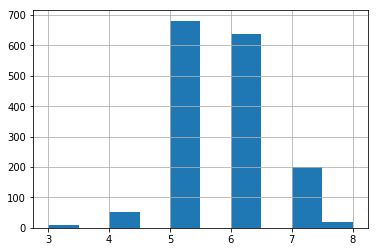

In [6]:
wine['quality'].hist()
plt.show()

No histograma acima, vemos que a maioria das observações tem uma qualidade intermediária (5 ou 6) e poucas tem os valores mais extremos. Em torno de 680 observações tem qualidade 5 (a qualidade mais comum).

## residual sugar

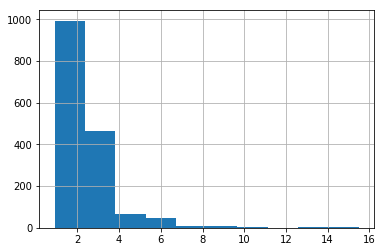

In [7]:
wine['residual sugar'].hist()
plt.show()

Observamos que os valores de *residual sugar* são, em geral, pequenos (o gráfico é mais alto na esquerda e tem uma cauda direita). No entanto, existem outliers (observações com valores que distoam da maioria), como as poucas observações com valores próximos de 14. Além disso, a maioria dos valores dessa feature estão entre 1 e 4.

## chlorides

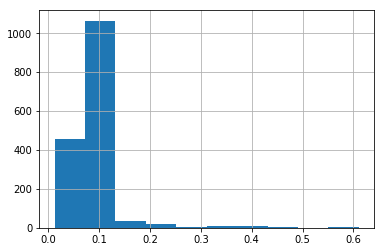

In [8]:
wine['chlorides'].hist()
plt.show()

Observamos que *chlorides* também tem uma cauda direta e outliers. Pelo gráfico acima, quase todos os valores de *chlorides* estão entre 0 e 0,15. Pelo saída de `wine.describe()` (visto no início do notebook), a média dessa feature é 0,087.

## Relação entre as features e a qualidade

Até aqui observamos as características de cada feature. A partir de agora precisamos entender como essas features se correlacionam e, especificamente, se há alguma relação entre as features e a qualidade do vinho. O primeiro passo é identificar a correlação $\rho$ entre as features e a qualidade. $\rho$ admite valores entre $-1$ e $1$ e indica o grau de correlação linear entre duas variáveis:

- se $\operatorname{\rho}(x,y) = 1$, então $y = ax+b \quad (a>0)$
- se $\operatorname{\rho}(x,y) = -1$, então $y = -ax+b \quad (a>0)$

Por exemplo:

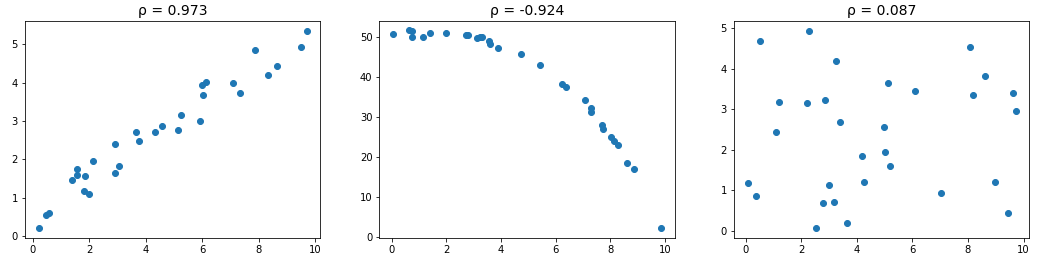

Os scatter plots (gráficos de dispersão) acima representam cada observação por meio de um ponto. Usaremos eles novamente mais a frente.

A correlação entre as features pode ser mostrada em uma matriz de correlação:

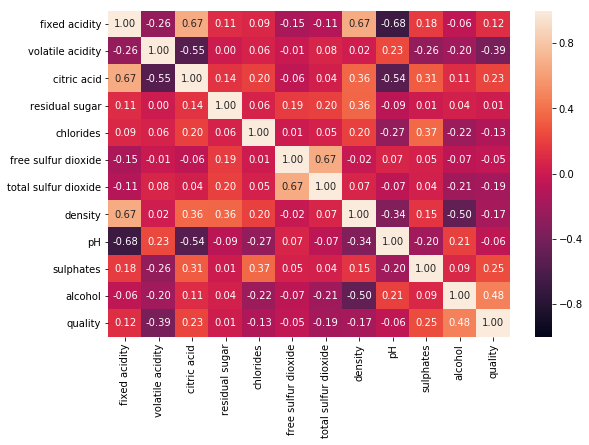

In [9]:
plt.figure(figsize=(9, 6))  # Aumenta o tamanho da figura
sns.heatmap(wine.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.show()

A partir da matriz acima, podemos identificar que as features que têm maior correlação com a qualidade são: *volatile acidity*, *sulphates* e *alcohol*. Portanto, analisaremos as relações entre essas features por meio de scatter plots. Nos gráficos abaixo, deixaremos os pontos transparentes por meio do parâmetro `alpha`, para que fique claro onde há maior concentração de pontos (caso contrário, alguns pontos seriam "escondidos" por outros pontos).

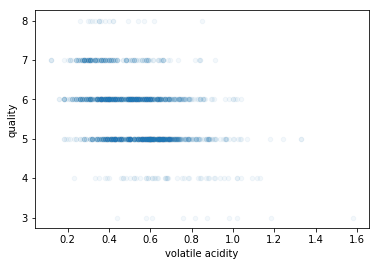

In [10]:
wine.plot(x='volatile acidity', y='quality', alpha=.05, kind='scatter')
plt.show()

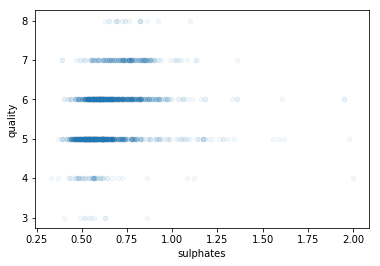

In [11]:
wine.plot(x='sulphates', y='quality', alpha=.05, kind='scatter')
plt.show()

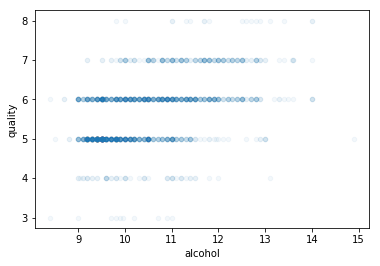

In [12]:
wine.plot(x='alcohol', y='quality', alpha=.05, kind='scatter')
plt.show()

Nos gráficos acima, podemos observar que há, de fato, correlação entre a qualidade e *volatile acidity*, *sulphates* e *alcohol*.

Podemos ainda analisar como duas features juntas afetam a qualidade. Nos gráficos abaixo, a cor de cada ponto indica a qualidade.

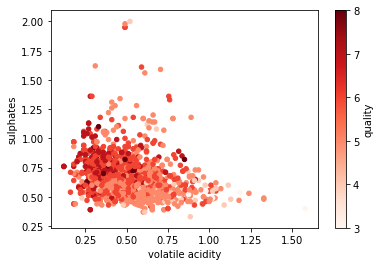

In [13]:
wine.plot(x='volatile acidity', y='sulphates', c='quality',
          cmap='Reds', kind='scatter', sharex=False)
plt.show()

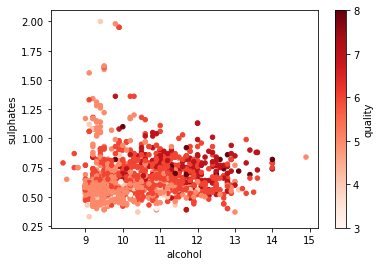

In [14]:
wine.plot(x='alcohol', y='sulphates', c='quality',
          cmap='Reds', kind='scatter', sharex=False)
plt.show()

Nos gráficos acima, vemos novamente que valores menores de *volatile acidity* e maiores de *sulphates* e *alcohol* correspondem a maiores qualidades.